# Homework 11

## Question 10.1 

Use the microstrip line formulas to plot the normalized current densities across the microstip trace's width vs normalized x (ie x/2). Select a w/h valu that would produce a 50 ohm characteristic impedance.

Width over height ratio: 1.9563120580697808


/tmp/ipykernel_1333/1802572179.py:33: RuntimeWarning: invalid value encountered in sqrt
  return A/np.sqrt( (math.cosh(pi* w/(h *8)))**2 - ( math.cosh(pi * x / (4 * h)) ) **2 )
/home/nikc/anaconda3/envs/EM/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: title={'center': 'Current Density vs Normalized Position'}, xlabel='Normalize Position (x/w)'>

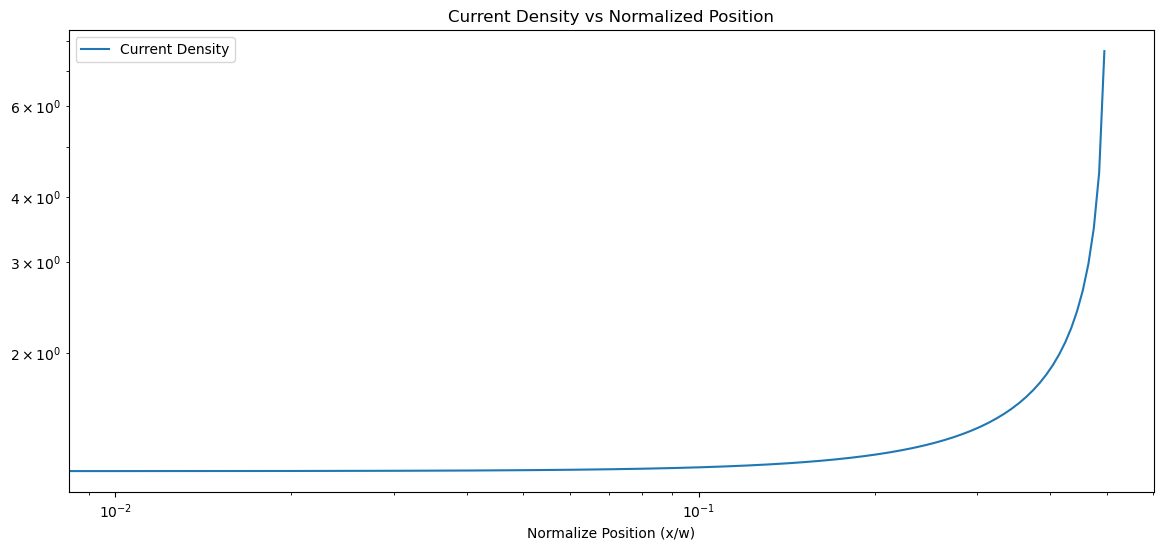

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import e, pi
import cmath
import matplotlib.pyplot as plt
from numpy import linspace, meshgrid, cos, pi, exp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import axes3d

Zo = 50 
mu = 1.26e-6
epsilon = 8.85e-12
e_r = 4

K = e ** ( (4 * pi * Zo) * math.sqrt((e_r + 1)/2) / math.sqrt(mu/epsilon) ) - 1
r_c = math.sqrt(0.4052 + 0.5160/e_r + 0.0788/(e_r**2))

width_over_height = 1/K * math.sqrt((8 * pi *(e_r + 1)/e_r) + 64* K * r_c)

print(f'Width over height ratio: {width_over_height}')

h = 1 
w = width_over_height * h
x = np.linspace(0, w, 100)
x_norm = x / w

def current_density (A, x):
    return A/np.sqrt( (math.cosh(pi* w/(h *8)))**2 - ( math.cosh(pi * x / (4 * h)) ) **2 )

v_current_density = np.vectorize(current_density)

current_density_vals = v_current_density(1, x)

d = {'Normalize Position (x/w)': x_norm, 
     'Current Density': current_density_vals
    }
data = pd.DataFrame(data=d)
data = data.set_index('Normalize Position (x/w)')

# Set the width and height of the figure
fig = plt.figure(figsize=(14,6))

# Add title
plt.title("Current Density vs Normalized Position")
plt.loglog()

sns.lineplot(data)


## Question 10.2

Use the technique from Example 10.2 to synthesize a signal with 100 ps rise time, then recreate Fig. 10.8 to demonstrate the corresponding pulse dispersion.

<Axes: title={'center': 'Frequency Dispersion'}, xlabel='time (nsec)'>

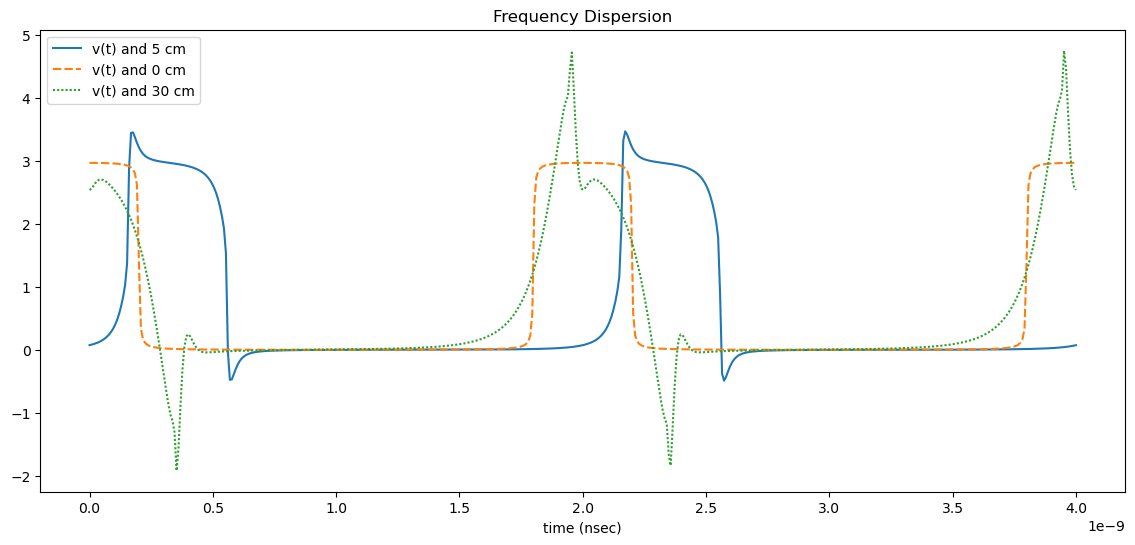

In [38]:
def e_r (f_Ghz):
    return 4.6 - 0.8 * e ** (-(f_Ghz -2)/30)

def voltage_square_wave (first_harmonic_Ghz, z, t, filter_kicker = 100):
    rv = 0.6
    w_o_Ghz = 2 * pi * first_harmonic_Ghz
    w_o = w_o_Ghz * 1e9
    for n in range (1, 1000, 1):
        a_n = 6/(n * pi) * np.sin(n * pi / 5)
        beta_n = n * w_o * math.sqrt(mu * epsilon * e_r (n * w_o_Ghz))
        alpha_n = 0.001 * beta_n
        # rv += a_n * np.cos(n * w_o * t - beta_n * z) * e ** (-alpha_n * z)
        rv += a_n * e ** (-n/filter_kicker) * np.cos(n * w_o * t - beta_n * z) * e ** (-alpha_n * z)
    return rv

N = 500

time_sweep = np.linspace(0, 4e-9, N)

v_z_equal_zero = np.zeros(N)
v_z_equal_5cm = np.zeros(N)
v_z_equal_30cm = np.zeros(N)

l_o = 3e8 / 0.5e9 

for i, t in enumerate(time_sweep):
    v_z_equal_zero[i] = voltage_square_wave(0.5, 0, t)
    v_z_equal_5cm[i] = voltage_square_wave(0.5, l_o/12, t)
    v_z_equal_30cm[i] = voltage_square_wave(0.5, l_o/2, t)

d = {'v(t) and 5 cm': v_z_equal_5cm, 
     'v(t) and 0 cm': v_z_equal_zero, 
     'v(t) and 30 cm': v_z_equal_30cm, 
    'time (nsec)': time_sweep
}

data = pd.DataFrame(data=d)
data = data.set_index('time (nsec)')

# Set the width and height of the figure
fig = plt.figure(figsize=(14,6))

# Add title
plt.title("Frequency Dispersion")


sns.lineplot(data)
    